In [2]:
import numpy as np
import pandas  as pd
import ast as ast
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [4]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [5]:
print(movies.columns)


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [6]:
movies=movies.merge(credits,on='title')

In [7]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [8]:
#keeping the colomns that are of our interest 
#genres
#id
#keywords
#title
#overview
#cast
#crew

movies=movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4809 non-null   int64 
 1   title     4809 non-null   object
 2   overview  4806 non-null   object
 3   genres    4809 non-null   object
 4   keywords  4809 non-null   object
 5   cast      4809 non-null   object
 6   crew      4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 263.1+ KB


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4809 non-null   int64 
 1   title     4809 non-null   object
 2   overview  4806 non-null   object
 3   genres    4809 non-null   object
 4   keywords  4809 non-null   object
 5   cast      4809 non-null   object
 6   crew      4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 263.1+ KB


In [11]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
# we need tags colomn for that we merge overview, genres, keywords, cast, crew 
# formatting all these colomns 
# removing missing data
# handling duplicate data

In [13]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [14]:
# 3 rows in overview has no value in it 

In [15]:
movies.dropna(inplace=True)

In [16]:
# now that 3 overview null is set

In [17]:
movies.duplicated().sum() #no duplicate movies

0

In [18]:
movies.iloc[0].genres


'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [19]:
#[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
# converting this format into 
# [action, adventure,fantasy, scifi] for genres differentiation
# crearing a funtion for this action

In [20]:
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
)

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [21]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L

In [22]:
movies['genres']=movies['genres'].apply(convert)

In [23]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [24]:
movies['keywords']=movies['keywords'].apply(convert)

In [25]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [26]:
movies['cast'] [0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [27]:
def convertName(text):
    L = []
    counter=0
    for i in ast.literal_eval(text):
        if counter!=3:
          L.append(i['name'])
          counter+=1
        else:
           break 
    return L

In [28]:
movies['cast'].apply(convertName)

0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4804    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4805         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4806           [Eric Mabius, Kristin Booth, Crystal Lowe]
4807            [Daniel Henney, Eliza Coupe, Bill Paxton]
4808    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4806, dtype: object

In [29]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [30]:
def fetchDirector(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
           L.append(i['name']) 
           break
    return L

In [31]:
movies['crew']=movies['crew'].apply(fetchDirector)

In [32]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",[Andrew Stanton]


In [33]:
#for getting the list of string of overview colomn 

In [34]:
movies['overview']= movies['overview'].apply(lambda x:x.split())

In [35]:
#removing spacing like cristopher nolan -> cristopherNolan
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ", "") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ", "") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ", "") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ", "") for i in x])

In [36]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[[, {, "", c, a, s, t, _, i, d, "", :, , 2, 4, 2...",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[[, {, "", c, a, s, t, _, i, d, "", :, , 4, ,, ,...",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[[, {, "", c, a, s, t, _, i, d, "", :, , 1, ,, ,...",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[[, {, "", c, a, s, t, _, i, d, "", :, , 2, ,, ,...",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[[, {, "", c, a, s, t, _, i, d, "", :, , 5, ,, ,...",[AndrewStanton]


In [37]:
movies['tags'] = movies['overview'] + \
                 movies['genres']+  \
                 movies['keywords']+ \
                 movies['cast']+ \
                 movies['crew']


In [38]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[[, {, "", c, a, s, t, _, i, d, "", :, , 2, 4, 2...",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[[, {, "", c, a, s, t, _, i, d, "", :, , 4, ,, ,...",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[[, {, "", c, a, s, t, _, i, d, "", :, , 1, ,, ,...",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[[, {, "", c, a, s, t, _, i, d, "", :, , 2, ,, ,...",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[[, {, "", c, a, s, t, _, i, d, "", :, , 5, ,, ,...",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [39]:
new_df = movies[['movie_id','title','tags']]

In [40]:
new_df

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


In [41]:
#converting list into string 
new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))

C:\Users\shumail faris\AppData\Local\Temp\ipykernel_7128\1269335359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))


In [42]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [43]:
new_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d [ { " c a s t _ i d " :  2 4 2 ,  " c h a r a c t e r " :  " J a k e  S u l l y " ,  " c r e d i t _ i d " :  " 5 6 0 2 a 8 a 7 c 3 a 3 6 8 5 5 3 2 0 0 1 c 9 a " ,  " g e n d e r " :  2 ,  " i d " :  6 5 7 3 1 ,  " n a m e " :  " S a m  W o r t h i n g t o n " ,  " o r d e r " :  0 } ,  { " c a s t _ i d " :  3 ,  " c h a r a c t e r " :  " N e y t i r i " ,  " c r e d i t _ i d " :  " 5 2 f e 4 8 0 0 9 2 5 1 4 1 6 c 7 5 0 a c 9 c b " ,  " g e n d e r " :  1 ,  " i d " :  8 6 9 1 ,  " n a m e " :  " Z o e  S a l d a n a " ,  " o r d e r " :  1 } ,  { " c a s t _ i d " :  2 5 ,  " c h a r a c

In [44]:
new_df['tags']=new_df['tags'].apply(lambda x:x.lower())

C:\Users\shumail faris\AppData\Local\Temp\ipykernel_7128\4224080999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:x.lower())


In [45]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [46]:
new_df.to_csv('newdef.csv', index=False)


In [47]:
#assignment 2 .... DATA VISUALISATION AND EXPLORATORY DATA ANALYSIS

In [48]:
# Summary statistics for numerical columns
print(new_df.describe())


            movie_id
count    4806.000000
mean    56922.559509
std     88309.447559
min         5.000000
25%      9009.750000
50%     14615.500000
75%     58476.750000
max    447027.000000


In [49]:

print(new_df.info())
print(new_df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 4806 entries, 0 to 4808
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4806 non-null   int64 
 1   title     4806 non-null   object
 2   tags      4806 non-null   object
dtypes: int64(1), object(2)
memory usage: 279.2+ KB
None
   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                tags  
0  in the 22nd century, a paraplegic marine is di...  
1  captain barbossa, long believed to be dead, ha...  
2  a cryptic message from bond’s past sends him o...  
3  following the death of district attorney harve...  
4  john carter is a war-weary, for

In [50]:
print(new_df.columns)


Index(['movie_id', 'title', 'tags'], dtype='object')


C:\Users\shumail faris\AppData\Local\Temp\ipykernel_7128\2701563895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tag_length_words'] = new_df['tags'].apply(lambda x: len(x.split()))


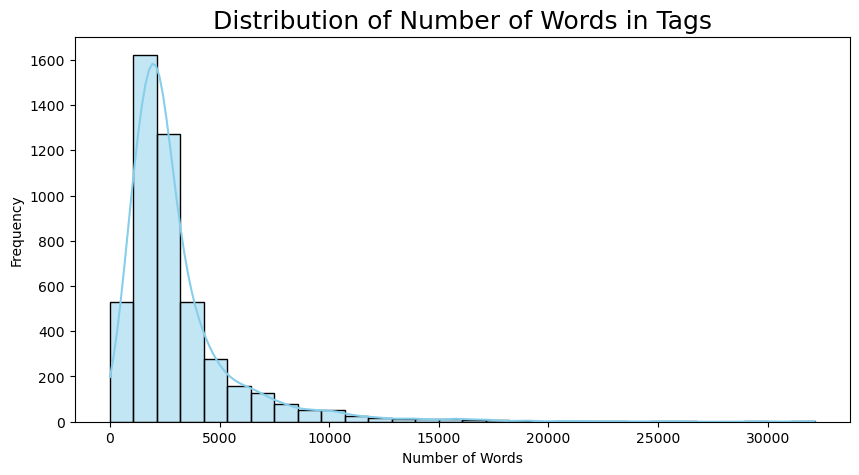

In [51]:
# Tag length in words
new_df['tag_length_words'] = new_df['tags'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,5))
sns.histplot(new_df['tag_length_words'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Number of Words in Tags', fontsize=18)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


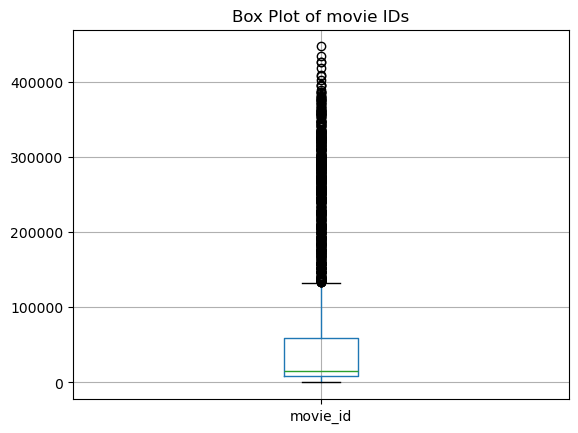

In [52]:
new_df.boxplot(column='movie_id')
plt.title('Box Plot of movie IDs')
plt.show()

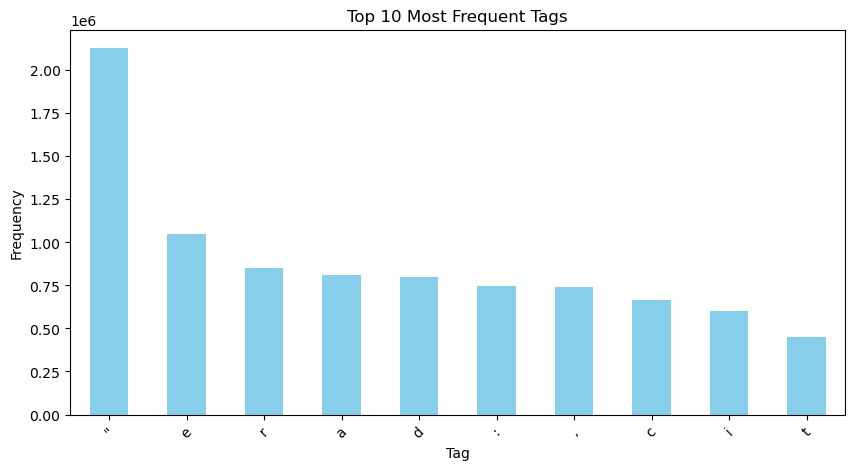

In [53]:

# Split the tags column by whitespace and create a list of all tags
tags_list = ' '.join(new_df['tags']).split()

# Create a DataFrame of tag counts
tag_counts = pd.Series(tags_list).value_counts()

# Plot the top 10 most frequent tags
tag_counts.head(10).plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Top 10 Most Frequent Tags')
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


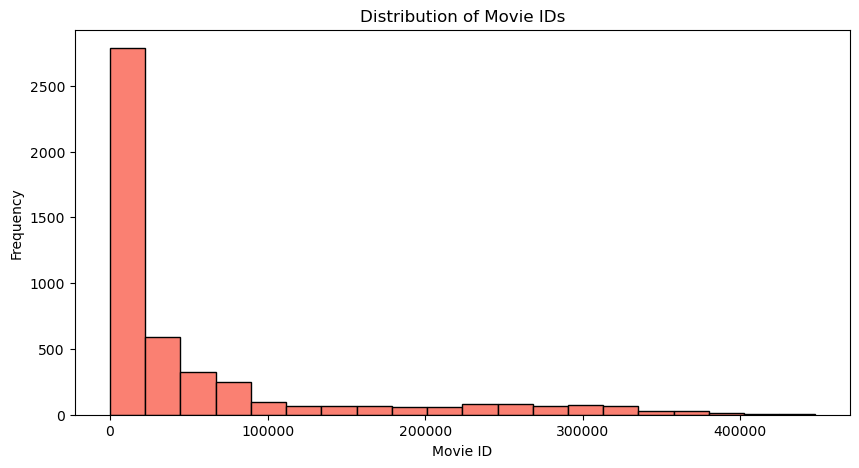

In [54]:
new_df['movie_id'].plot(kind='hist', bins=20, figsize=(10, 5), color='salmon', edgecolor='black')
plt.title('Distribution of Movie IDs')
plt.xlabel('Movie ID')
plt.ylabel('Frequency')
plt.show()


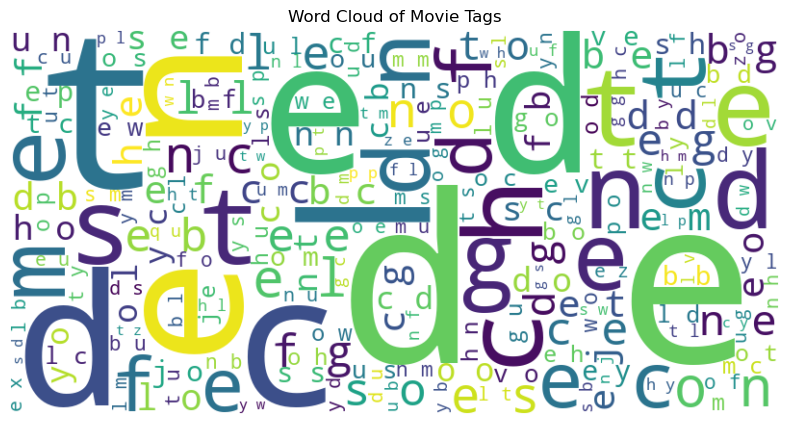

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all tags into a single string
tags_text = ' '.join(new_df['tags'])

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tags_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Tags')
plt.show()


In [56]:
new_df['title_length'] = new_df['title'].apply(lambda x: len(x))

C:\Users\shumail faris\AppData\Local\Temp\ipykernel_7128\3130191576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['title_length'] = new_df['title'].apply(lambda x: len(x))


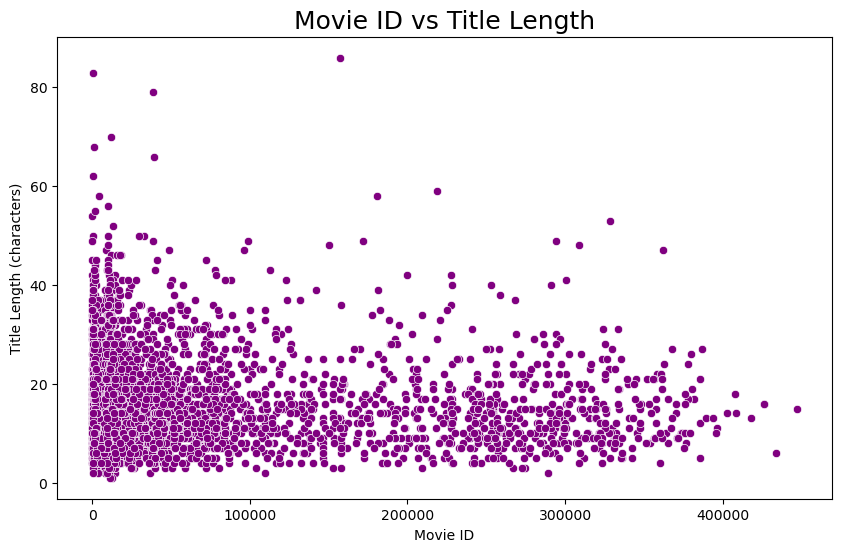

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='movie_id', y='title_length', data=new_df, color='purple')
plt.title('Movie ID vs Title Length', fontsize=18)
plt.xlabel('Movie ID')
plt.ylabel('Title Length (characters)')
plt.show()


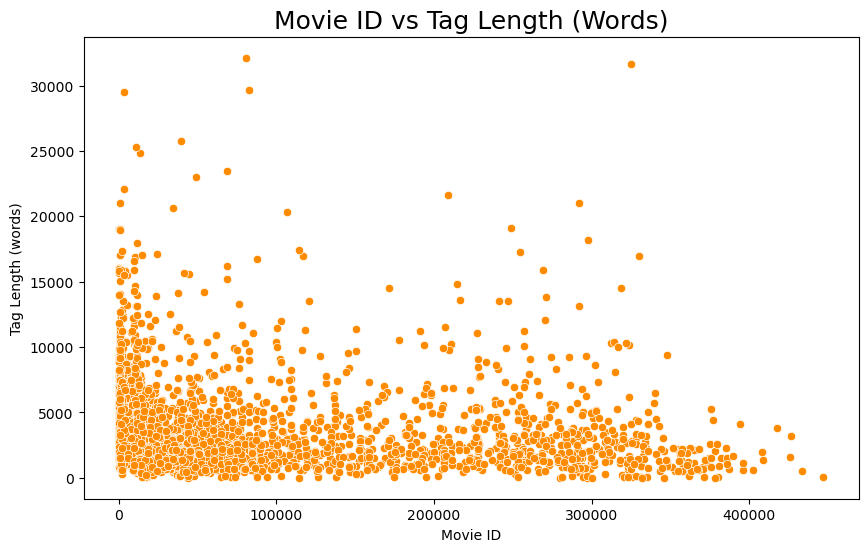

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='movie_id', y='tag_length_words', data=new_df, color='darkorange')
plt.title('Movie ID vs Tag Length (Words)', fontsize=18)
plt.xlabel('Movie ID')
plt.ylabel('Tag Length (words)')
plt.show()


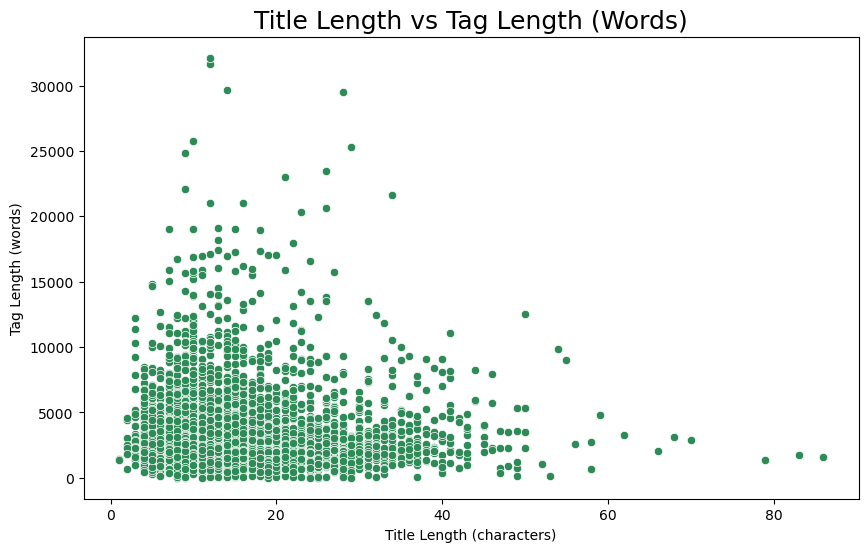

In [59]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='title_length', y='tag_length_words', data=new_df, color='seagreen')
plt.title('Title Length vs Tag Length (Words)', fontsize=18)
plt.xlabel('Title Length (characters)')
plt.ylabel('Tag Length (words)')
plt.show()


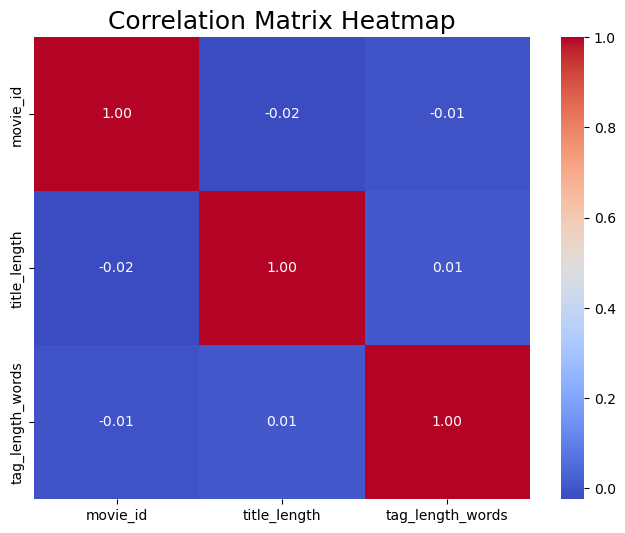

                  movie_id  title_length  tag_length_words
movie_id          1.000000     -0.023960         -0.007268
title_length     -0.023960      1.000000          0.007891
tag_length_words -0.007268      0.007891          1.000000


In [60]:
# Select only numeric columns
corr_df = new_df[['movie_id', 'title_length', 'tag_length_words']]

# Correlation matrix
corr_matrix = corr_df.corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap', fontsize=18)
plt.show()

# Print the actual correlation values
print(corr_matrix)


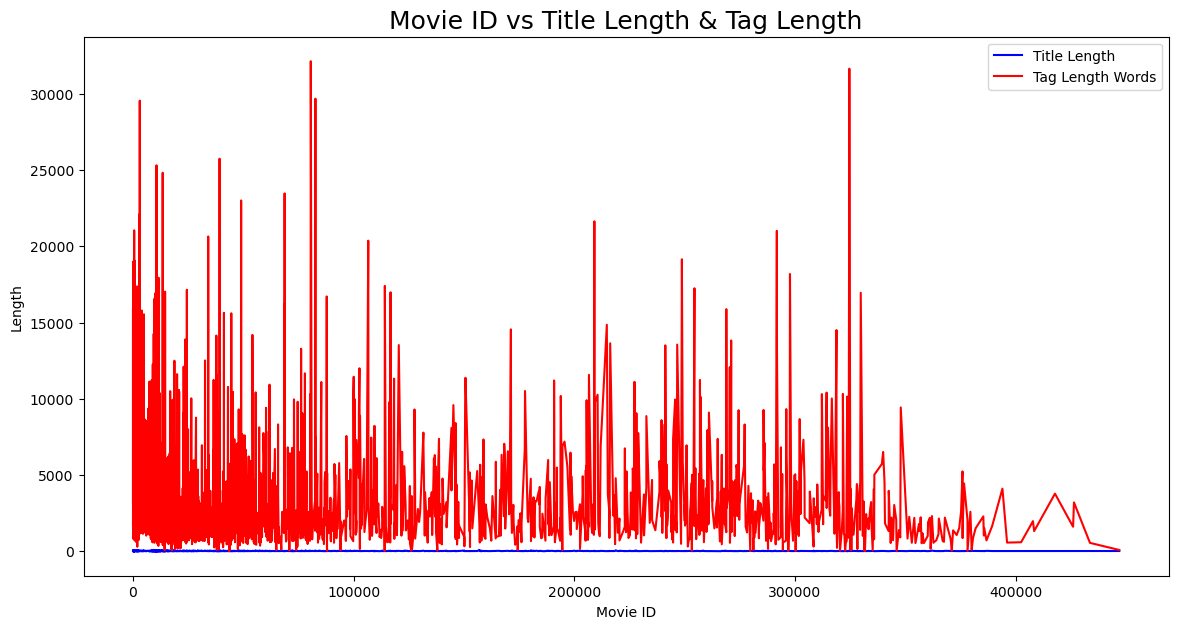

In [61]:
# Multiple lines for trend view
plt.figure(figsize=(14,7))

sns.lineplot(x='movie_id', y='title_length', data=new_df, label='Title Length', color='blue')
sns.lineplot(x='movie_id', y='tag_length_words', data=new_df, label='Tag Length Words', color='red')

plt.title('Movie ID vs Title Length & Tag Length', fontsize=18)
plt.xlabel('Movie ID')
plt.ylabel('Length')
plt.legend()
plt.show()


In [62]:
# vectorization using bag of words technique

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [64]:
import nltk

In [65]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [66]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)
    

In [67]:
new_df['tags'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d [ { " c a s t _ i d " :  2 4 2 ,  " c h a r a c t e r " :  " j a k e  s u l l y " ,  " c r e d i t _ i d " :  " 5 6 0 2 a 8 a 7 c 3 a 3 6 8 5 5 3 2 0 0 1 c 9 a " ,  " g e n d e r " :  2 ,  " i d " :  6 5 7 3 1 ,  " n a m e " :  " s a m  w o r t h i n g t o n " ,  " o r d e r " :  0 } ,  { " c a s t _ i d " :  3 ,  " c h a r a c t e r " :  " n e y t i r i " ,  " c r e d i t _ i d " :  " 5 2 f e 4 8 0 0 9 2 5 1 4 1 6 c 7 5 0 a c 9 c b " ,  " g e n d e r " :  1 ,  " i d " :  8 6 9 1 ,  " n a m e " :  " z o e  s a l d a n a " ,  " o r d e r " :  1 } ,  { " c a s t _ i d " :  2 5 ,  " c h a r a c

In [68]:
stem('in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilizat')

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilizat'

In [69]:
new_df['tags'] = new_df['tags'].apply(stem)

C:\Users\shumail faris\AppData\Local\Temp\ipykernel_7128\3213734980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


In [70]:
new_df['tags']

0       in the 22nd century, a parapleg marin is dispa...
1       captain barbossa, long believ to be dead, ha c...
2       a cryptic messag from bond’ past send him on a...
3       follow the death of district attorney harvey d...
4       john carter is a war-weary, former militari ca...
                              ...                        
4804    el mariachi just want to play hi guitar and ca...
4805    a newlyw couple' honeymoon is upend by the arr...
4806    "signed, sealed, delivered" introduc a dedic q...
4807    when ambiti new york attorney sam is sent to s...
4808    ever sinc the second grade when he first saw h...
Name: tags, Length: 4806, dtype: object

In [71]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [72]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [73]:
cv.get_feature_names_out()[103]

'admir'

In [74]:
# now calculating cosine distance not uclidean 

In [75]:
from sklearn.metrics.pairwise import cosine_similarity

In [76]:
similarity = cosine_similarity(vectors)

In [77]:
similarity

array([[1.        , 0.08980265, 0.08980265, ..., 0.04622502, 0.        ,
        0.        ],
       [0.08980265, 1.        , 0.06451613, ..., 0.02490677, 0.        ,
        0.0277137 ],
       [0.08980265, 0.06451613, 1.        , ..., 0.02490677, 0.        ,
        0.        ],
       ...,
       [0.04622502, 0.02490677, 0.02490677, ..., 1.        , 0.03962144,
        0.04279605],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08817334],
       [0.        , 0.0277137 , 0.        , ..., 0.04279605, 0.08817334,
        1.        ]])

In [78]:
# recommendation of movies 

In [79]:
def recommend(movie):
   movie_index = new_df[new_df['title'] == movie].index[0]
   distances = similarity[movie_index]
   movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:11]
   
   for i in movies_list:
    print(new_df.iloc[i[0]].title)

In [80]:
new_df['title']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4804                                 El Mariachi
4805                                   Newlyweds
4806                   Signed, Sealed, Delivered
4807                            Shanghai Calling
4808                           My Date with Drew
Name: title, Length: 4806, dtype: object

In [81]:
recommend('John Carter')

Krrish
The Other Side of Heaven
Riddick
Get Carter
The Legend of Hercules
Khumba
King's Ransom
I Am Number Four
The Adventures of Elmo in Grouchland
Battleship


In [82]:
import pickle

In [ ]:
pickle.dump(new_df,open('movies.pkl','wb'))

In [88]:
pickle.dump(new_df.to_dict(),open('movies_dict.pkl','wb'))

In [89]:
pickle.dump(similarity,open('similarity.pkl','wb'))